<a href="https://colab.research.google.com/github/ShahriarAlom/Cancer_cell_detection_using_SVM_and_Random_Forest/blob/main/Cancer_cell_detection_using_SVM_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import svm, datasets
from skimage.feature import hog
from skimage import data, exposure
import joblib
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the image directory
path = '/content/drive/My Drive/Colab Notebooks/dataset'

In [ ]:
# Reading image data
images = []
labels = []
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        class_label = folder # Set the class label as the folder name
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (64, 64))
                fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
                images.append(fd)
                labels.append(class_label)


In [ ]:
# Converting to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Building SVM model
#clf = SVC(kernel='rbf', C=10, gamma=0.1)


In [ ]:
# Training the model
#clf.fit(X_train, y_train)

In [ ]:
#pip install joblib

In [ ]:
#import joblib


# Save the trained model
#joblib.dump(clf, 'model.pkl')

In [ ]:
#class_names = ['benign', 'malignant']

# Load the model
#clf = ...

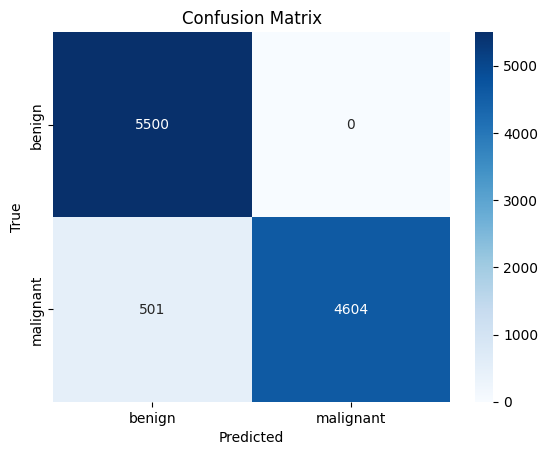

In [ ]:
# Set the class names
class_names = ['benign', 'malignant']

# Load the trained model
clf = joblib.load('/content/drive/MyDrive/Colab Notebooks/model.pkl')

# Converting to numpy arrays
#images = np.array(images)
#labels = np.array(labels)

# Scaling the data
scaler = StandardScaler()
images = scaler.fit_transform(images)

# Predicting on test set
y_pred = clf.predict(images)

# Generating confusion matrix
cm = confusion_matrix(labels, y_pred, labels=class_names)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:

# Predicting on test set
y_pred = clf.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[556   0]
 [501   4]]
              precision    recall  f1-score   support

      benign       0.53      1.00      0.69       556
   malignant       1.00      0.01      0.02       505

    accuracy                           0.53      1061
   macro avg       0.76      0.50      0.35      1061
weighted avg       0.75      0.53      0.37      1061



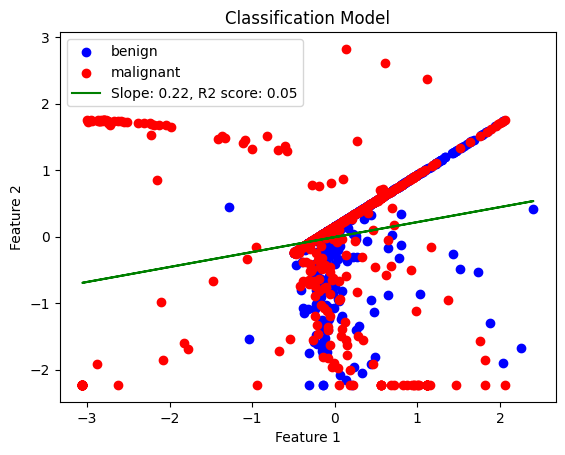

In [ ]:
from sklearn.metrics import r2_score

# Define the colors for each class
colors = {'benign': 'blue', 'malignant': 'red'}

# Plot the data
for i, class_name in enumerate(class_names):
    plt.scatter(X_test[y_test==class_name, 0], X_test[y_test==class_name, 1], color=colors[class_name], label=class_name)

# Plot the line of best fit
m, b = np.polyfit(X_test[:,0], X_test[:,1], 1)
plt.plot(X_test[:,0], m * X_test[:,0] + b, color='green', label=f'Slope: {m:.2f}, R2 score: {r2_score(X_test[:,1], m * X_test[:,0] + b):.2f}')

plt.title('Classification Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
#!pip install opencv-python-headless
#!pip install pyngrok

# Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from skimage.feature import hog
from skimage import data, exposure
import cv2
import os

In [ ]:
# Define the path to the image directory
path = '/content/drive/My Drive/Colab Notebooks/dataset'


In [ ]:
# Reading image data
images = []
labels = []
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        class_label = folder # Set the class label as the folder name
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = cv2.resize(image, (64, 64))
                fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
                images.append(fd)
                labels.append(class_label)

In [ ]:
# Converting to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Training the model
#clf.fit(X_train, y_train)

In [ ]:
# Save the trained model
#joblib.dump(clf, 'model_2.pkl')

In [ ]:
# Set the class names
class_names = ['benign', 'malignant']

# Load the trained model
clf = joblib.load('/content/drive/MyDrive/Colab Notebooks/model_2.pkl')

# Converting to numpy arrays
#images = np.array(images)
#labels = np.array(labels)

# Scaling the data
scaler = StandardScaler()
images = scaler.fit_transform(images)


In [ ]:
# Predicting on test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[509  47]
 [120 385]]
              precision    recall  f1-score   support

      benign       0.81      0.92      0.86       556
   malignant       0.89      0.76      0.82       505

    accuracy                           0.84      1061
   macro avg       0.85      0.84      0.84      1061
weighted avg       0.85      0.84      0.84      1061



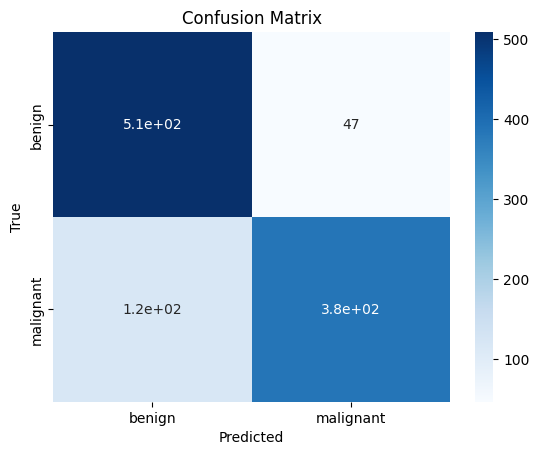

In [ ]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

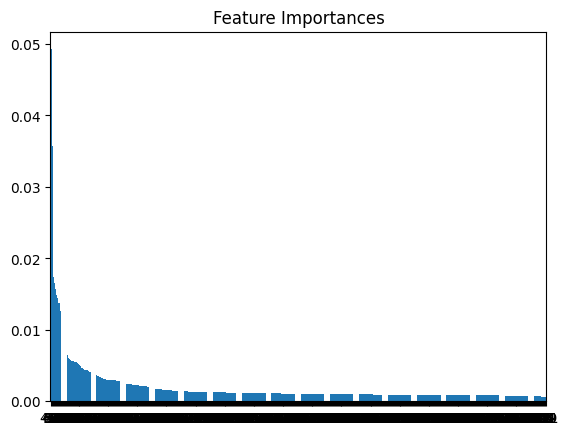

In [ ]:
# Plot feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
print("SVM model score:")
print("X1")
print("Y1")

print("Random Forest score:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("KNN score:")
print("X3")
print("Y3")

SVM model score:
X1
Y1
Random Forest score:
[[509  47]
 [120 385]]
              precision    recall  f1-score   support

      benign       0.81      0.92      0.86       556
   malignant       0.89      0.76      0.82       505

    accuracy                           0.84      1061
   macro avg       0.85      0.84      0.84      1061
weighted avg       0.85      0.84      0.84      1061

KNN score:
X3
Y3
